# OBJECTIVE: extract reviews for a product from amazon.in and perform emotion mining.

# We have used reviews for a product "Canon Printer"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

In [2]:
AmazonReviews = pd.read_csv("C:\\Users\\siddh\\Downloads\\CanonPrinter.csv")
AmazonReviews

,id,profileName,text,date,title,rating,images,helpful,Pattern name
0,R2LJJZHB0XN8IW,joel prasad,\n It shows that wireless/wifi connectivity i...,Reviewed in India on 14 December 2018,Wrong information shown in Amazon,1,NaN,36,Printer
1,R4P7M695N0EHL,Sumeet Gilra,\n I am using this printer around 3 years and...,Reviewed in India on 7 October 2018,Value for Money,5,NaN,18,Printer
2,RVD6LMJR268N,Amazon Customer,\n I bought this printer 3 years back. I use ...,Reviewed in India on 3 September 2018,Value for Money,5,NaN,17,Printer
3,RWA22UKF7LX6Z,soko,\n The product discriptiinnwrongly states tha...,Reviewed in India on 3 December 2019,Incorrect Description by seller,1,NaN,1,Printer
4,R3PGZUTAC5JJE2,Vasanth,\n I bought this printer for 4899 and i'm ref...,Reviewed in India on 7 June 2020,Worst Printer,1,NaN,1,Printer
...,...,...,...,...,...,...,...,...,...
195,R1V4DOQPGGVSNC,Shubham Roy,\n I had a HP deskjet 1560 before which was a...,Reviewed in India on 28 March 2015,I had a HP deskjet 1560 before which was annoy...,4,NaN,1,Printer
196,R2NCJPBCJPGJUC,Manpreet Singh,\n A very nice printer. Very easy to setup an...,Reviewed in India on 11 March 2015,A good quality compact printer,5,NaN,1,Printer
197,R1JL6N9Q3AJ47W,Bijoy Chakraborty,\n Thanks Amazon for fast delivery and giving...,Reviewed in India on 6 December 2014,Best budget home Printer,5,NaN,1,Printer
198,R102ON33ZZLGYI,Gautham Kiran,\n Canon Pixma E 510 qualifies all the requir...,Reviewed in India on 23 December 2014,Wonderful product for Home Usage,5,NaN,1,Printer


In [3]:
# A total of 200 rows and 9 columns are there in the data set

In [4]:
AmazonReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            200 non-null    object
 1   profileName   200 non-null    object
 2   text          200 non-null    object
 3   date          200 non-null    object
 4   title         200 non-null    object
 5   rating        200 non-null    int64 
 6   images        5 non-null      object
 7   helpful       200 non-null    int64 
 8   Pattern name  200 non-null    object
dtypes: int64(2), object(7)
memory usage: 14.2+ KB


In [5]:
# There are no Null Values present in the data set.

In [6]:
# information on the variable "rating"
AmazonReviews['rating'].value_counts() 

5    81
4    58
1    41
3    14
2     6
Name: rating, dtype: int64

In [7]:
# From the above we observed that Most product are 5-star Rated(81).

In [8]:
AmazonReviews['rating'].describe()

count    200.000000
mean       3.660000
std        1.528424
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

# DATA VISULAIZATION

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

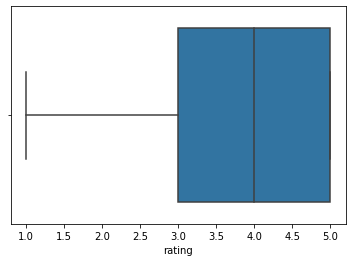

In [9]:
# Data visualization through boxplot representation

sns.boxplot(AmazonReviews['rating'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

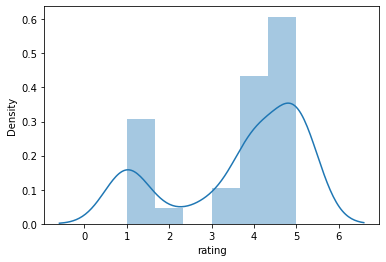

In [10]:
# Dist-plot representation of the variable

sns.distplot(AmazonReviews['rating'])

In [11]:
# From the above distplot we concluded that the variable rating is negatively skewed.

# TEXT BLOB
# Using Text-Blob to identify the subjectivity and polarity of the variable "text"

In [12]:
from textblob import TextBlob

def sentiment_analysis(ds):
    sentiment = TextBlob(ds["text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
AmazonReviews[["subjectivity", "polarity"]] = AmazonReviews.apply(sentiment_analysis, axis = 1)
AmazonReviews[["subjectivity", "polarity"]]

,subjectivity,polarity
0,0.587500,0.004167
1,0.617778,0.357407
2,0.277143,0.037143
3,0.700000,-0.075000
4,0.590741,0.062963
...,...,...
195,0.529630,0.057407
196,0.643030,0.283333
197,0.484375,0.173958
198,0.505903,0.269792


# Using Text-Blob to identify the subjectivity and polarity of the variable "title"

In [13]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds['title']).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
AmazonReviews[["subjectivity_title", "polarity_title"]] = AmazonReviews.apply(sentiment_analysis, axis = 1)
AmazonReviews[["subjectivity_title", "polarity_title"]]

,subjectivity_title,polarity_title
0,0.9,-0.5
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,-1.0
...,...,...
195,0.9,-0.8
196,0.6,0.7
197,0.3,1.0
198,1.0,1.0


# WORD-CLOUD

# Plotting word-cloud for "text"

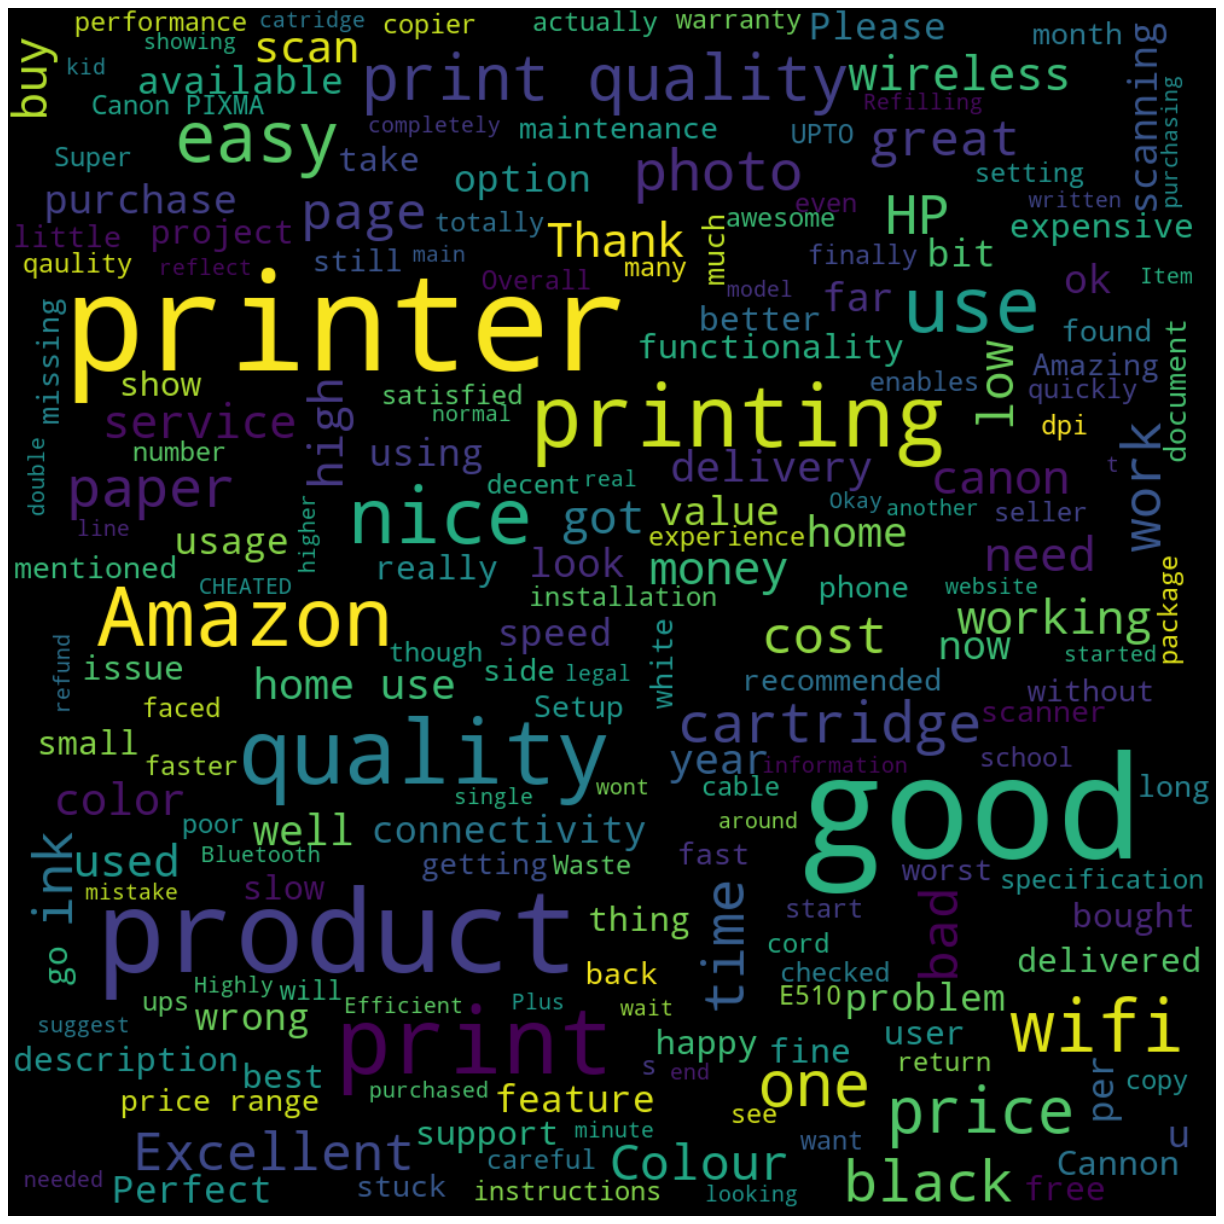

In [14]:
from wordcloud import WordCloud
allwords = " ".join([rev for rev in AmazonReviews["text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [15]:
# From the above we can see that the repeatative words are printer, printing, color, copy.

# Plotting word-cloud for "title"

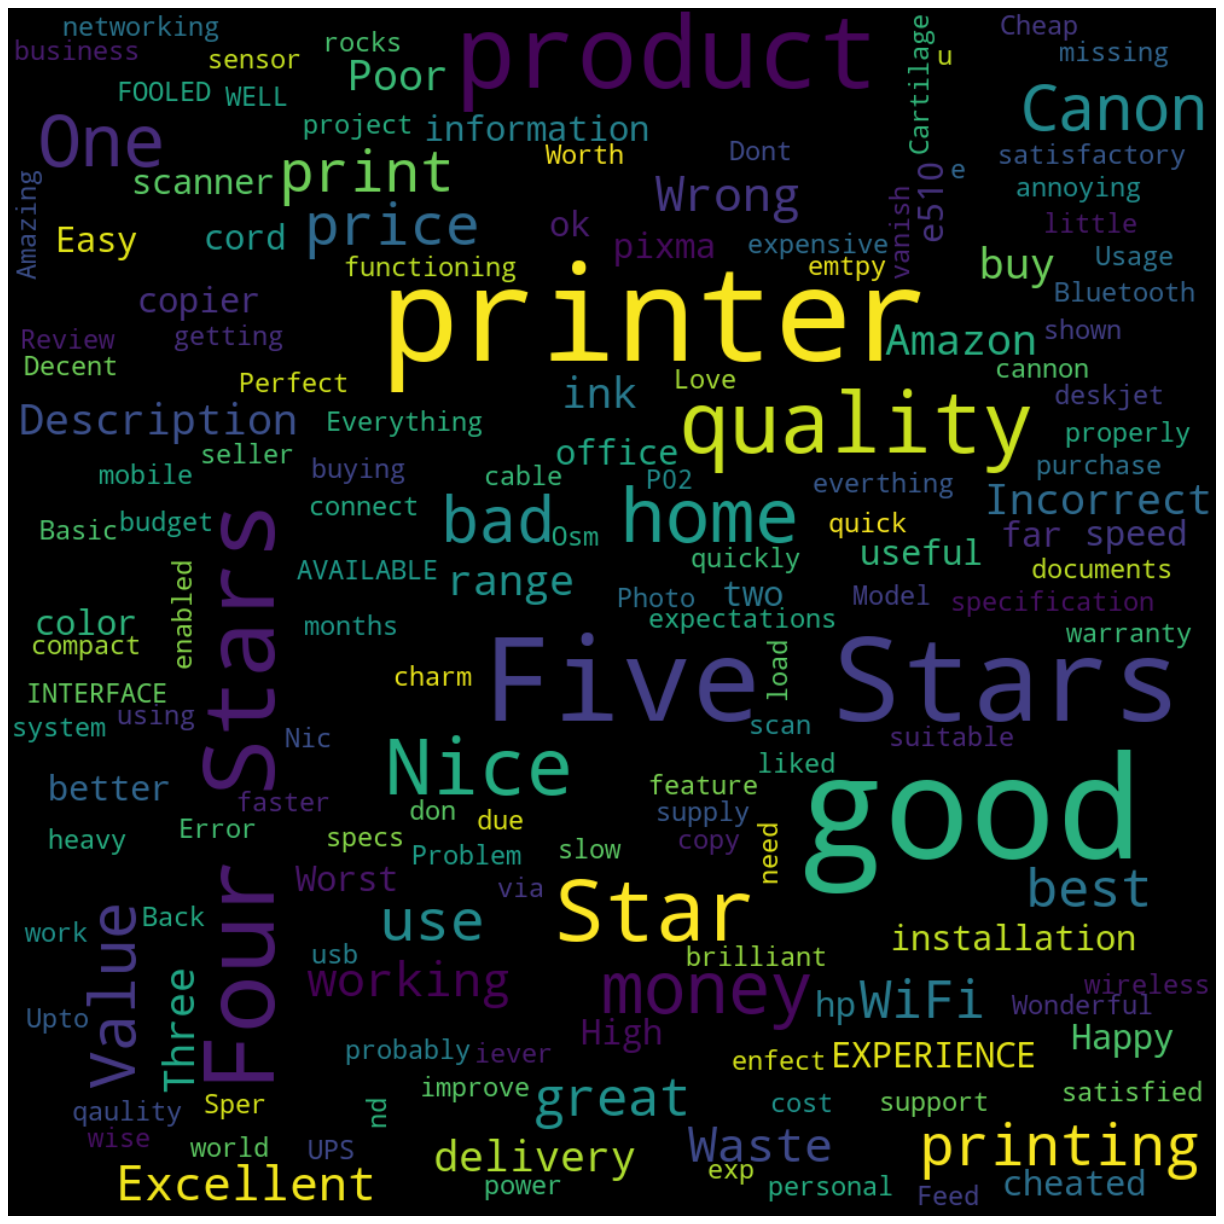

In [16]:
allwords = " ".join([rev for rev in AmazonReviews["title"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [17]:
# In the above we can see that the repetative words are good, bad, brilliant, awesome.

# EMOTION MINING

In [18]:
# Emotion Mining on "text"
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

AmazonReviews["analysis"] = AmazonReviews["polarity"].apply(analysis)
AmazonReviews["analysis"]

0      Positive
1      Positive
2      Positive
3      Negative
4      Positive
         ...   
195    Positive
196    Positive
197    Positive
198    Positive
199    Positive
Name: analysis, Length: 200, dtype: object

In [19]:
# Emotion Mining on title
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

AmazonReviews["analysis_title"] = AmazonReviews["polarity_title"].apply(analysis)
AmazonReviews["analysis_title"]

0      Negative
1       Neutral
2       Neutral
3       Neutral
4      Negative
         ...   
195    Negative
196    Positive
197    Positive
198    Positive
199    Positive
Name: analysis_title, Length: 200, dtype: object

# TF-IDF VECTORIZER

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(AmazonReviews)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['analysis', 'analysis_title', 'date', 'helpful', 'id', 'images', 'name', 'pattern', 'pattern name', 'polarity', 'polarity_title', 'profilename', 'rating', 'subjectivity', 'subjectivity_title', 'text', 'title']
[[0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.  

In [21]:
AmazonReviews["analysis"].value_counts()

Positive    144
Negative     36
Neutral      20
Name: analysis, dtype: int64

In [22]:
AmazonReviews["analysis_title"].value_counts()

Neutral     93
Positive    79
Negative    28
Name: analysis_title, dtype: int64

In [23]:
# From the above analysis we can see that most of the customers are neutral.
# Thus we can conclude that the customers are neither happy nor sad about the product.